Необходимо запустить практическую часть занятия, и посмотреть самому то, о чём говорили на лекции. 

По образу практики, попробуйте создать искусственный датасет с лишними столбцами. 

Целевую метку, при правильной обработке данных, формируйте таким образом, чтобы без затруднений её смогла описать линейная модель. Ориентируйтесь на то, что было показано во время занятия, и каждый шаг описывайте в markdown. 

Здесь важно видеть ваш ход мысли. Не бойтесь ошибиться или написать не то. Данное задание не имеет какого-то “правильного” решения. 

Цель - достичь базового понимания проблемы. Чем больше вы фантазируете, тем лучше :) Тем не менее, старайтесь представить те ситуации, которые по-вашему мнению могли бы быть в реальных данных. Успеха!

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [2]:
# Создаём сэмпл (вес, длина, ширина и высота коробки с мягкими игрушками в сантиметрах и стоимость ее транспортировки в рублях)

n_samples = 1000

weight = np.random.choice(4, n_samples) + 1
length = np.random.choice(50, n_samples) + 3
width = np.random.choice(40, n_samples) + 1
height = np.random.choice(50, n_samples) + 2

price = length * width * height // 100 + 200

data = pd.DataFrame({'weight': weight, 'length': length, 'width': width, 'height': height, 'price': price})
data.head()

,weight,length,width,height,price
0,2,26,2,51,226
1,3,25,7,49,285
2,4,36,33,41,687
3,3,36,20,9,264
4,2,5,30,44,266


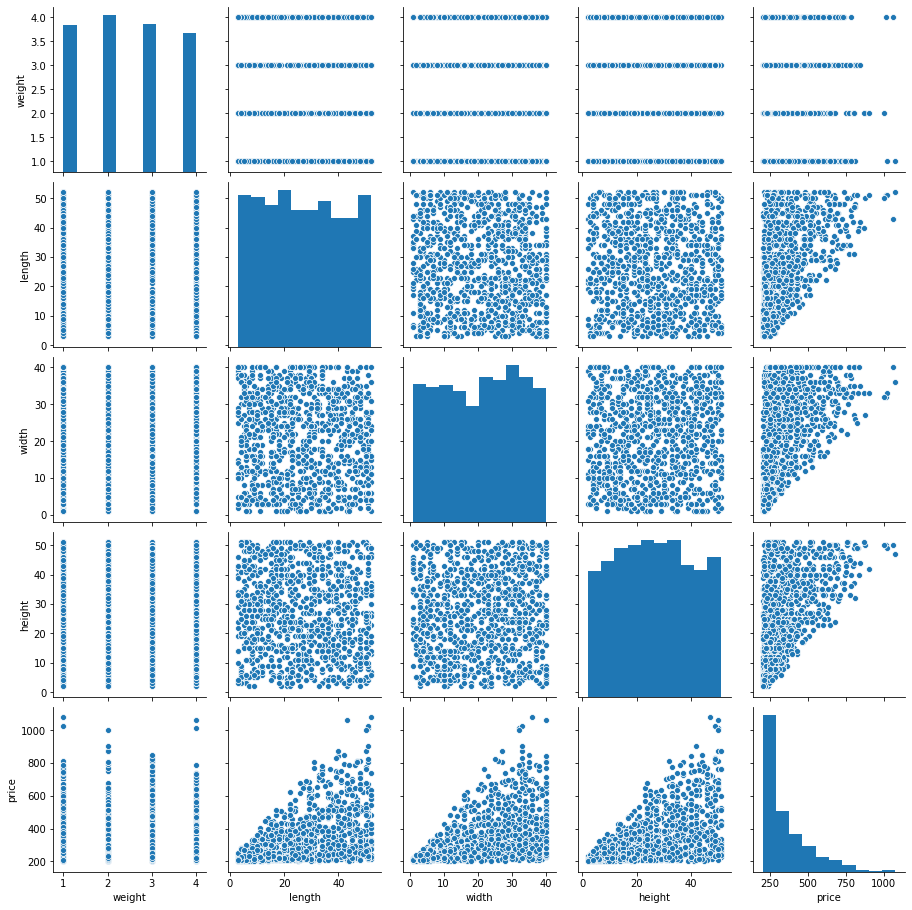

In [3]:
# посмотрим на зависимость переменных
sns.pairplot(data)

In [4]:
# Построим линейную регрессию на всех параметрах

from sklearn.metrics import mean_absolute_error

X = data[['weight', 'length', 'width', 'height']]
y = data['price']
reg = LinearRegression().fit(X, y)
print('Weights: {}'.format(reg.coef_))
print('Bias: {}'.format(reg.intercept_))

pred_values = reg.predict(data[['weight', 'length', 'width', 'height']])
print('Error: {}'.format(mean_absolute_error(pred_values, y)))

Weights: [2.03696509 5.50510983 6.71405795 5.59193053]
Bias: -93.75742265241854
Error: 56.15658644377208


In [5]:
# Ошибка довольно большая: 56, при средней стоимости
y.median()

290.0

In [6]:
# попробуем не принимать в рассчет вес коробки (т.к. в них мягкие игрушки, то вес коробок не сильно отличается)

X = data[['length', 'width', 'height']]
y = data['price']
reg = LinearRegression().fit(X, y)
print('Weights: {}'.format(reg.coef_))
print('Bias: {}'.format(reg.intercept_))

pred_values = reg.predict(data[['length', 'width', 'height']])
print('Error: {}'.format(mean_absolute_error(pred_values, y)))

Weights: [5.49962435 6.71981604 5.59085746]
Bias: -88.6630832421265
Error: 56.22616737235464


In [7]:
# параметры не улучшились

# может быть стоимость зависит не от линейных размеров, а от объема коробки?

In [8]:
# Создаем новый признак (объем коробки)
data['volume'] = data['length'] * data['width'] * data['height']
data.head()

,weight,length,width,height,price,volume
0,2,26,2,51,226,2652
1,3,25,7,49,285,8575
2,4,36,33,41,687,48708
3,3,36,20,9,264,6480
4,2,5,30,44,266,6600


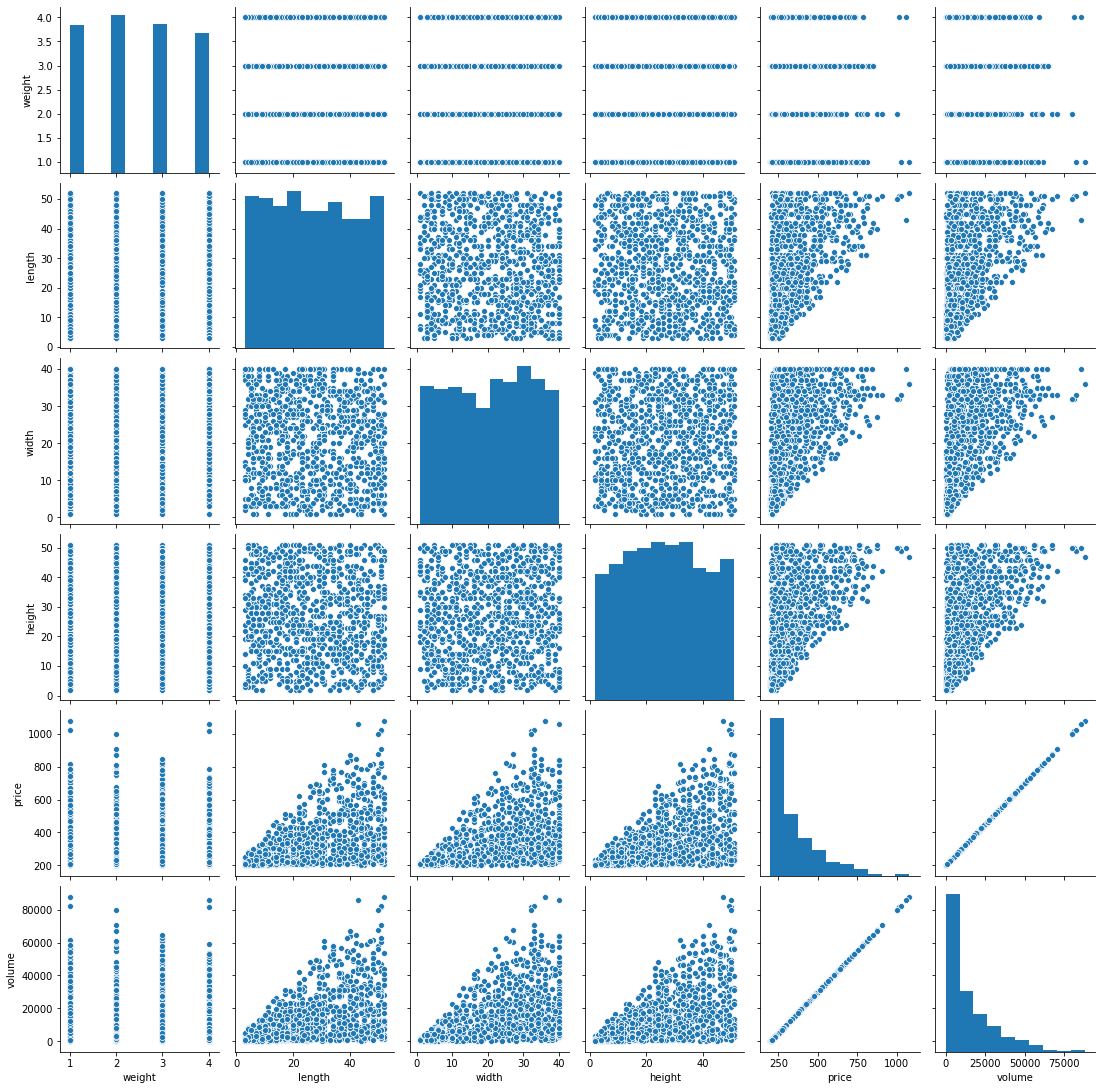

In [9]:
sns.pairplot(data)

In [10]:
# Видим абсолютную линейную зависимость стоимости транспортировки от нового параметра объема коробки.

In [11]:
# Построим линейную регрессию на одном этом параметре

X = data[['volume']]
y = data['price']
reg = LinearRegression().fit(X, y)
print('Weights: {}'.format(reg.coef_))
print('Bias: {}'.format(reg.intercept_))

pred_values = reg.predict(data[['volume']])
print('Error: {}'.format(mean_absolute_error(pred_values, y)))

Weights: [0.0100017]
Bias: 199.5267328786119
Error: 0.2589866333739468


In [12]:
# Параметры намного лучше, ошибка небольшая.